In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astroML.density_estimation import KDE, KNeighborsDensity
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [36]:
font = {'size':16}
matplotlib.rc('font', **font)

In [2]:
fitspath = '../data/sdss_fields/'

In [26]:
def InfoFromFits(fitsname):
    h = fits.open(fitsname)
    t = h[1].data
    
    g = t['psfMag_g']
    i = t['psfMag_i']
    r = t['psfMag_r']
    eg = t['psfMagErr_g']
    ei = t['psfMagErr_i']
    er = t['psfMagErr_r']
    
    ra = t['ra']
    dec = t['dec']
    
    return (ra, dec, g, i, r)

In [4]:
def KDE(ra, dec, kernel = 'gaussian', vm = 10000):

    ramin = min(ra)
    ramax = max(ra)
    decmin = min(dec)
    decmax = max(dec)

    x, y = np.mgrid[ramin:ramax:300j, decmin:decmax:300j]
    Xgrid = np.vstack([x.ravel(), y.ravel()]).T

    values = np.vstack([ra, dec])
    X = values.T

    kde1 = KernelDensity(0.01, kernel=kernel)
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((300,300))

    return (dens1.T)

In [27]:
# Leo I

leo1 = fitspath+'leo1.fits'

(ra_leo1, dec_leo1, g_leo1, i_leo1, r_leo1) = InfoFromFits(leo1)

In [29]:
# Leo II

leo2 = fitspath+'leo2.fits'

(ra_leo2, dec_leo2, g_leo2, i_leo2, r_leo2) = InfoFromFits(leo2)

In [30]:
# Segue

segue = fitspath+'segue.fits'

(ra_segue, dec_segue, g_segue, i_segue, r_segue) = InfoFromFits(segue)

In [31]:
# Draco

draco = fitspath+'draco.fits'

(ra_draco, dec_draco, g_draco, i_draco, r_draco ) = InfoFromFits(draco)

In [32]:
# WillmanI

willman = fitspath+'willman1.fits'

(ra_willman, dec_willman, g_willman, i_willman, r_willman) = InfoFromFits(willman)

# ---------------------------------------------------------------------------------
# Draco

### $M_{V}$ = -8.8, $r_{h}$ = 221 pc, $\mu_{V}$ = 25.0

In [10]:
draco_gaussian = KDE(ra_draco, dec_draco, kernel='gaussian')

In [11]:
draco_tophat = KDE(ra_draco, dec_draco, kernel = 'tophat')

In [12]:
draco_exponential = KDE(ra_draco, dec_draco, kernel = 'exponential')

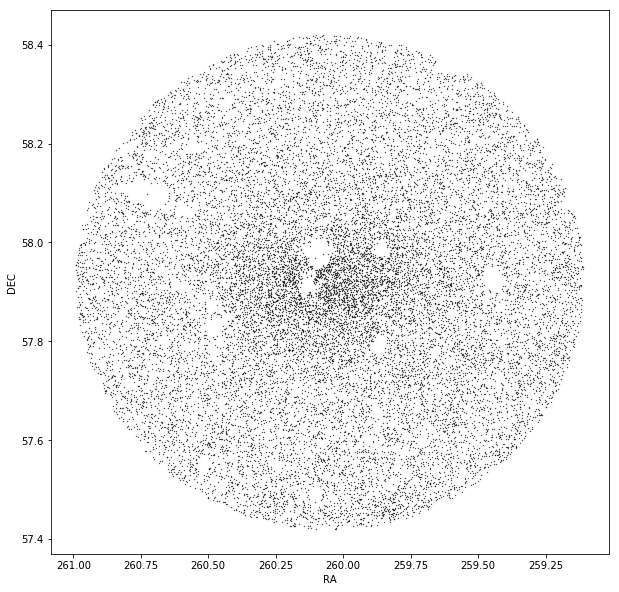

In [13]:
plt.figure(figsize = (10, 10))

plt.scatter(ra_draco, dec_draco, s = 0.1, c = 'k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()

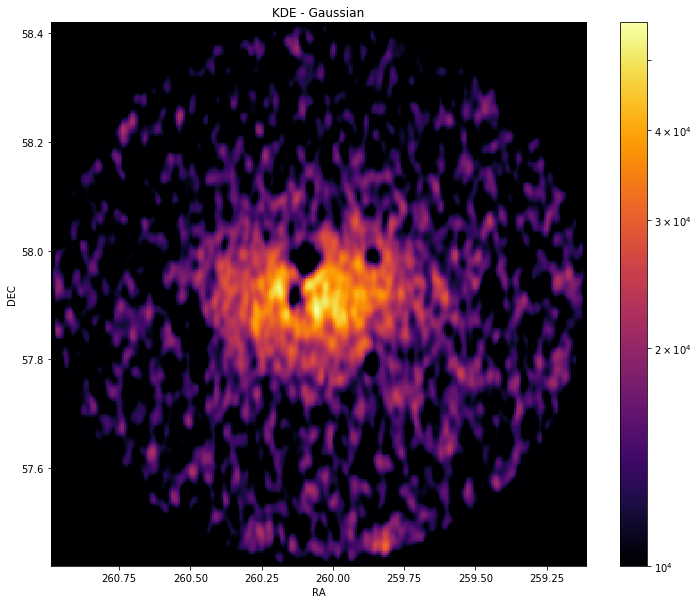

In [22]:
plt.figure(figsize = (12,10))

ramin = min(ra_draco)
ramax = max(ra_draco)
decmin = min(dec_draco)
decmax = max(dec_draco)

plt.title('KDE - Gaussian')
plt.imshow(draco_gaussian, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

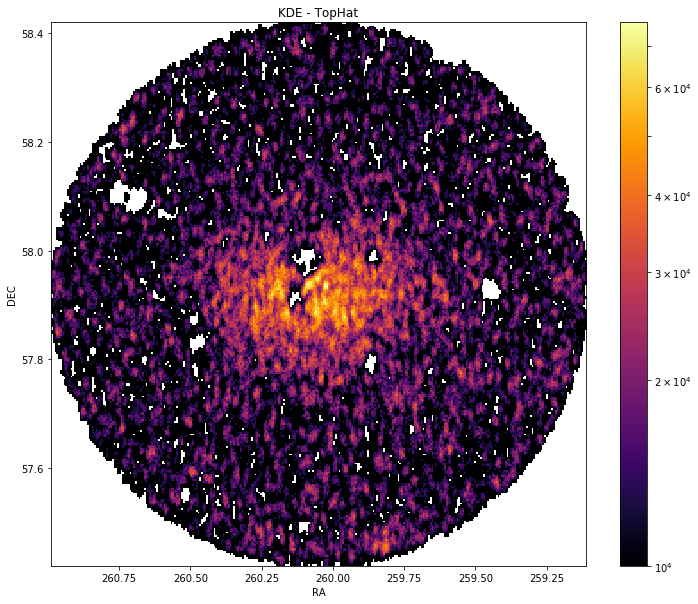

In [23]:
plt.figure(figsize = (12,10))

ramin = min(ra_draco)
ramax = max(ra_draco)
decmin = min(dec_draco)
decmax = max(dec_draco)

plt.title('KDE - TopHat')
plt.imshow(draco_tophat, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

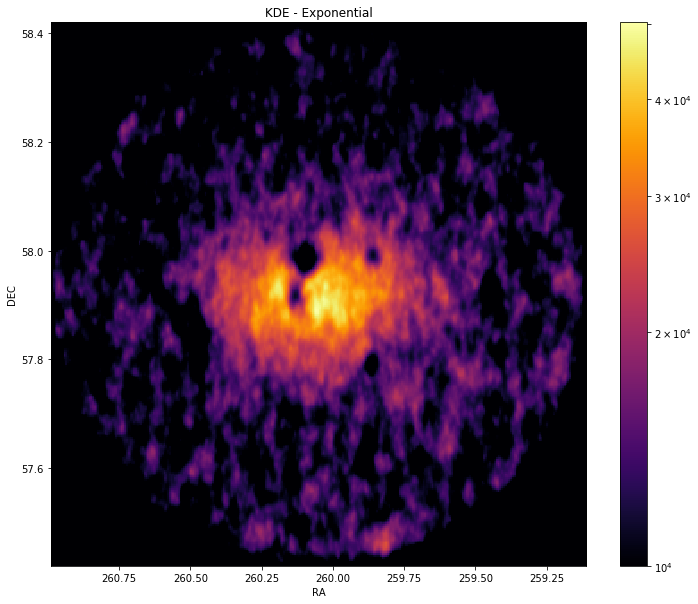

In [24]:
plt.figure(figsize = (12,10))

ramin = min(ra_draco)
ramax = max(ra_draco)
decmin = min(dec_draco)
decmax = max(dec_draco)

plt.title('KDE - Exponential')
plt.imshow(draco_exponential, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

In [25]:
gal_draco = np.where((ra_draco >= 259.75) & (ra_draco <= 260.50) & (dec_draco >= 57.80) & (dec_draco <= 58.0))
bg = np.where((ra_draco >= 259.50) & (ra_draco <= 259.75) & (dec_draco >= 57.6) & (dec_draco <= 57.70))

In [33]:
g = g_draco[gal_draco]
i = i_draco[gal_draco]
r = r_draco[gal_draco]

g_bg = g_draco[bg]
i_bg = i_draco[bg]
r_bg = r_draco[bg]

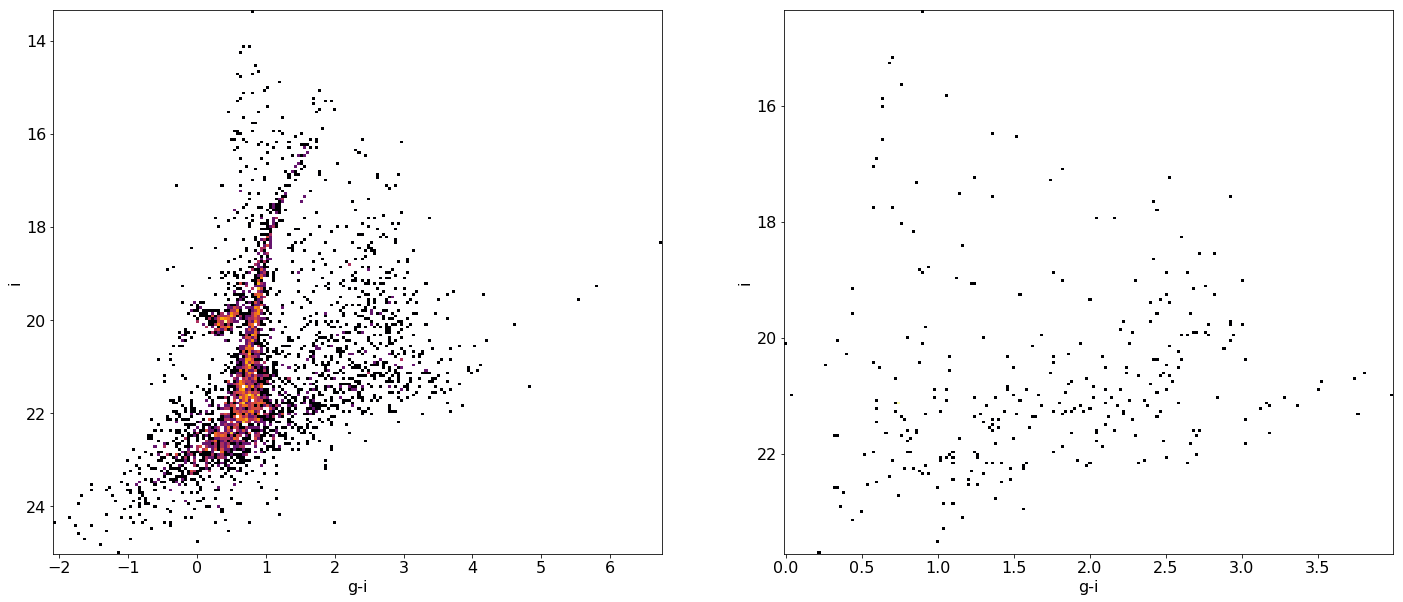

In [37]:
plt.figure(figsize = (24, 10))

plt.subplot2grid((1,2), (0,0))
plt.hist2d(g-i, i, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()

plt.subplot2grid((1,2), (0,1))
plt.hist2d(g_bg-i_bg, i_bg, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()

# ----------------------------------------------------------------------------------------
# Leo II

### $M_{V}$ = -9.8, $r_{h}$ = 176 pc , $\mu_{V}$ = 24.2

In [43]:
leo2_gaussian = KDE(ra_leo2, dec_leo2, kernel='gaussian')

In [44]:
leo2_tophat = KDE(ra_leo2, dec_leo2, kernel = 'tophat')

In [45]:
leo2_exponential = KDE(ra_leo2, dec_leo2, kernel = 'exponential')

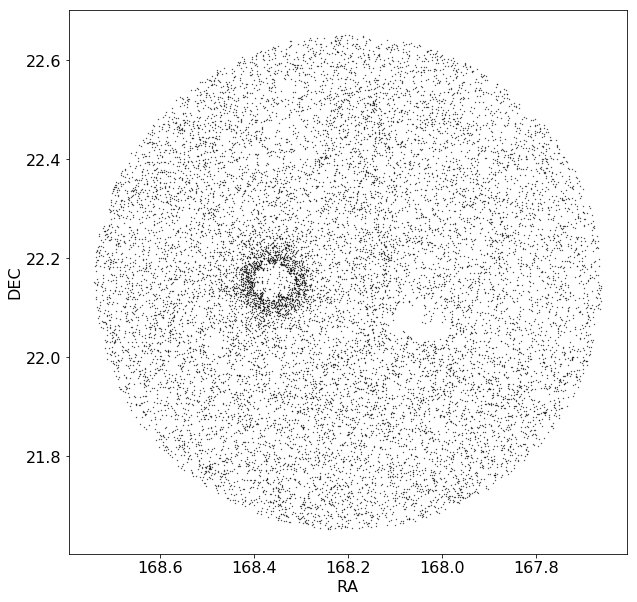

In [46]:
plt.figure(figsize = (10, 10))

plt.scatter(ra_leo2, dec_leo2, s = 0.1, c = 'k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()

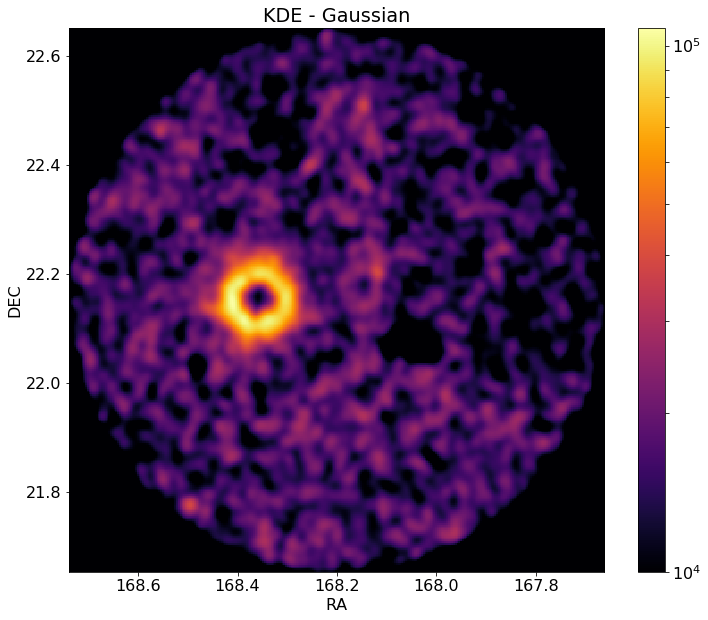

In [47]:
plt.figure(figsize = (12,10))

ramin = min(ra_leo2)
ramax = max(ra_leo2)
decmin = min(dec_leo2)
decmax = max(dec_leo2)

plt.title('KDE - Gaussian')
plt.imshow(leo2_gaussian, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

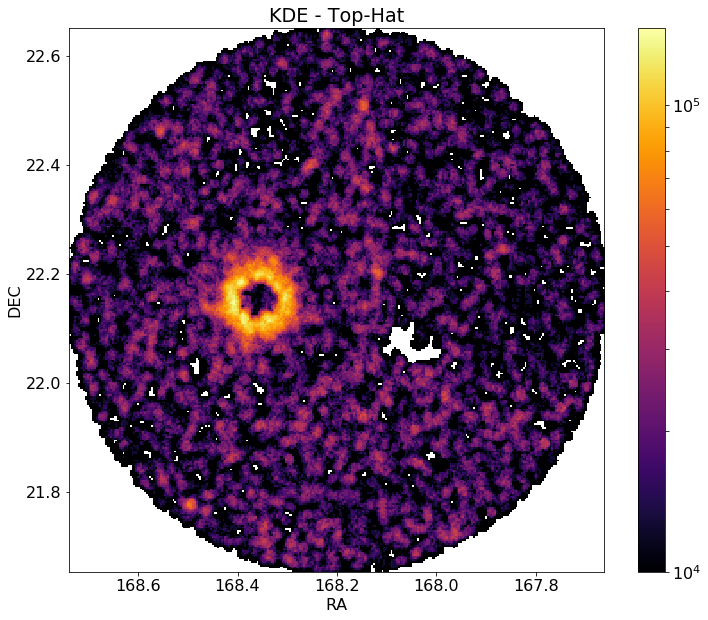

In [48]:
plt.figure(figsize = (12,10))

ramin = min(ra_leo2)
ramax = max(ra_leo2)
decmin = min(dec_leo2)
decmax = max(dec_leo2)

plt.title('KDE - Top-Hat')
plt.imshow(leo2_tophat, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

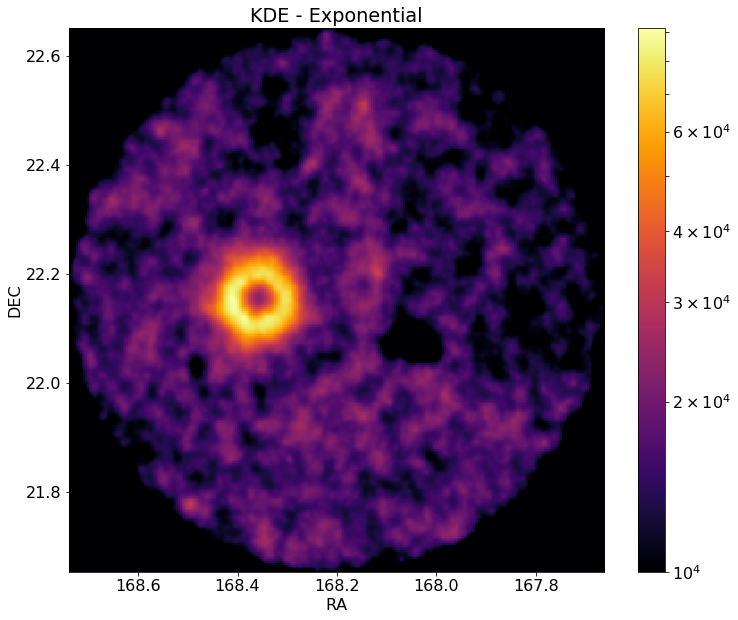

In [49]:
plt.figure(figsize = (12,10))

ramin = min(ra_leo2)
ramax = max(ra_leo2)
decmin = min(dec_leo2)
decmax = max(dec_leo2)

plt.title('KDE - Exponential')
plt.imshow(leo2_exponential, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

In [50]:
gal_leo2 = np.where((ra_leo2 >= 168.3) & (ra_leo2 <= 168.5) & (dec_leo2 >= 22.0) & (dec_leo2 <= 22.30))
bg = np.where((ra_leo2 >= 168.0) & (ra_leo2 <= 168.2) & (dec_leo2 >= 21.80) & (dec_leo2 <= 21.90))

In [51]:
g = g_leo2[gal_leo2]
i = i_leo2[gal_leo2]
r = r_leo2[gal_leo2]

g_bg = g_leo2[bg]
i_bg = i_leo2[bg]
r_bg = r_leo2[bg]

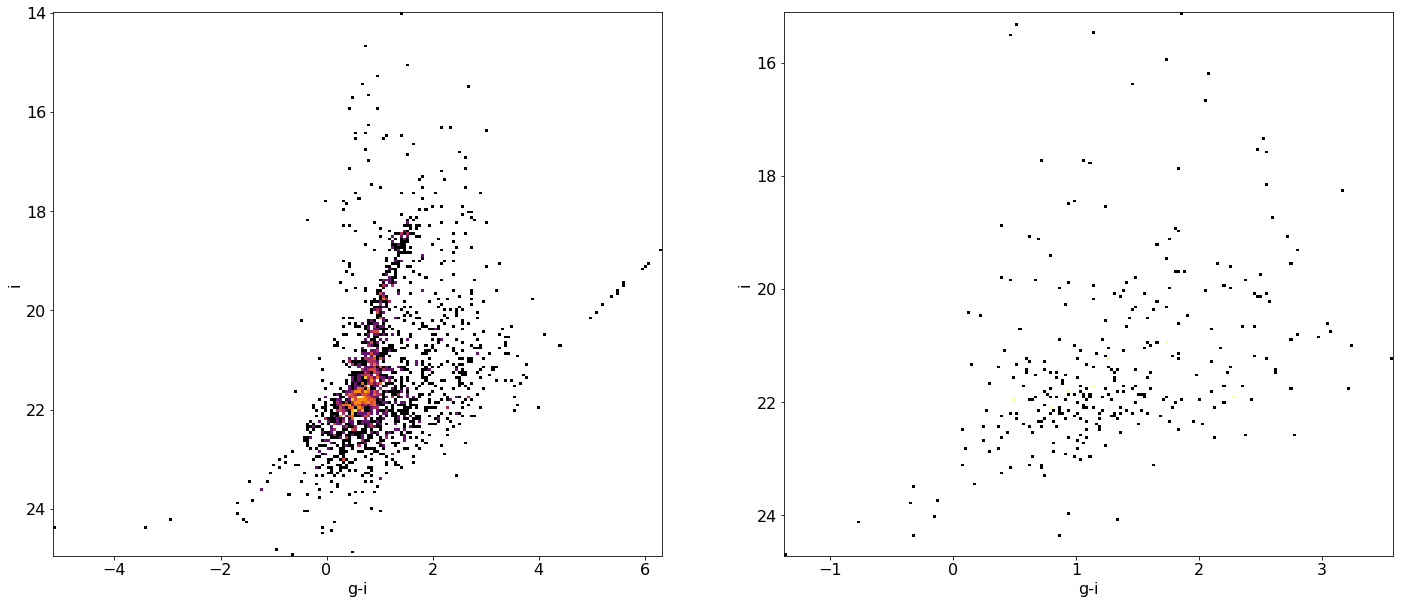

In [52]:
plt.figure(figsize = (24, 10))

plt.subplot2grid((1,2), (0,0))
plt.hist2d(g-i, i, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()

plt.subplot2grid((1,2), (0,1))
plt.hist2d(g_bg-i_bg, i_bg, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()

# -----------------------------------------------------------------------------------------
# Segue

### $M_{V}$ = -1.5, $r_{h}$ = 29 pc , $\mu_{V}$ = 27.6

In [53]:
segue_gaussian = KDE(ra_segue, dec_segue, kernel='gaussian')

In [54]:
segue_tophat = KDE(ra_segue, dec_segue, kernel='tophat')

In [55]:
segue_exponential = KDE(ra_segue, dec_segue, kernel='exponential')

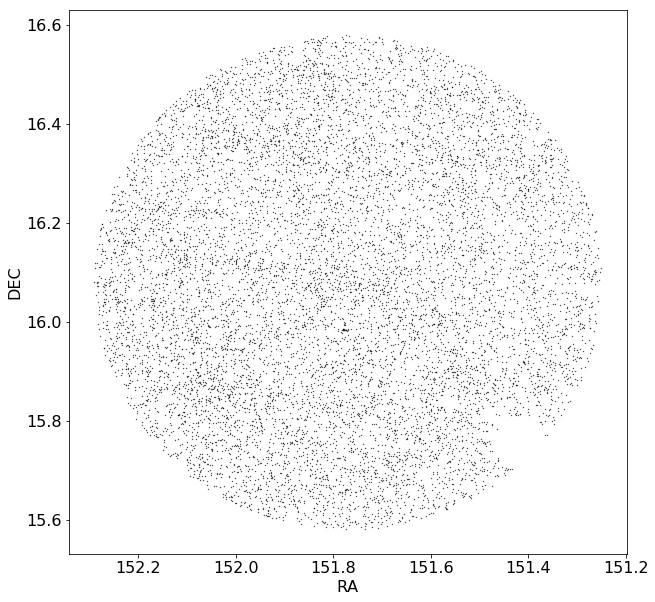

In [56]:
plt.figure(figsize = (10, 10))

plt.scatter(ra_segue, dec_segue, s = 0.1, c = 'k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()

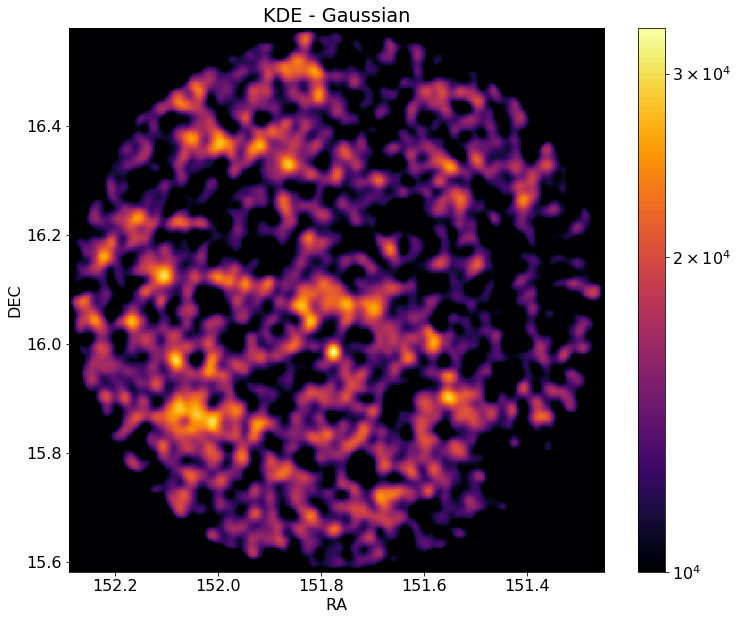

In [57]:
plt.figure(figsize = (12,10))

ramin = min(ra_segue)
ramax = max(ra_segue)
decmin = min(dec_segue)
decmax = max(dec_segue)

plt.title('KDE - Gaussian')
plt.imshow(segue_gaussian, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

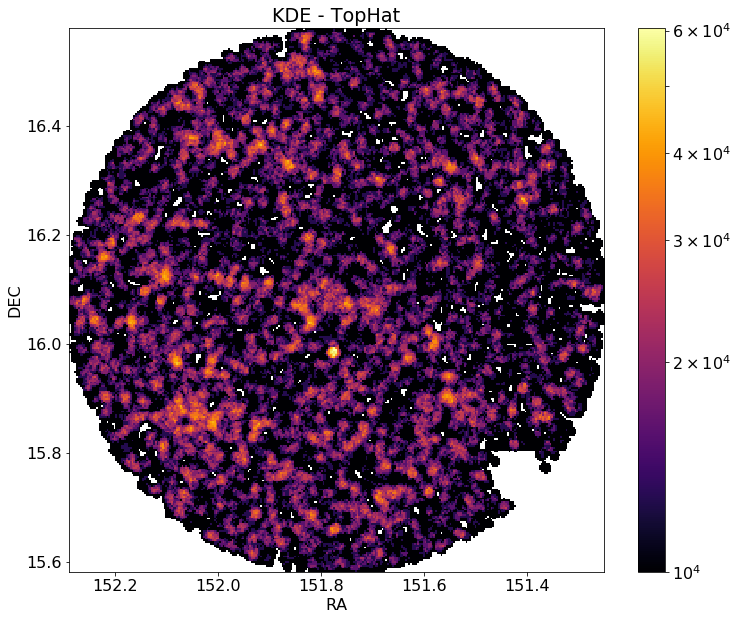

In [58]:
plt.figure(figsize = (12,10))

ramin = min(ra_segue)
ramax = max(ra_segue)
decmin = min(dec_segue)
decmax = max(dec_segue)

plt.title('KDE - TopHat')
plt.imshow(segue_tophat, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

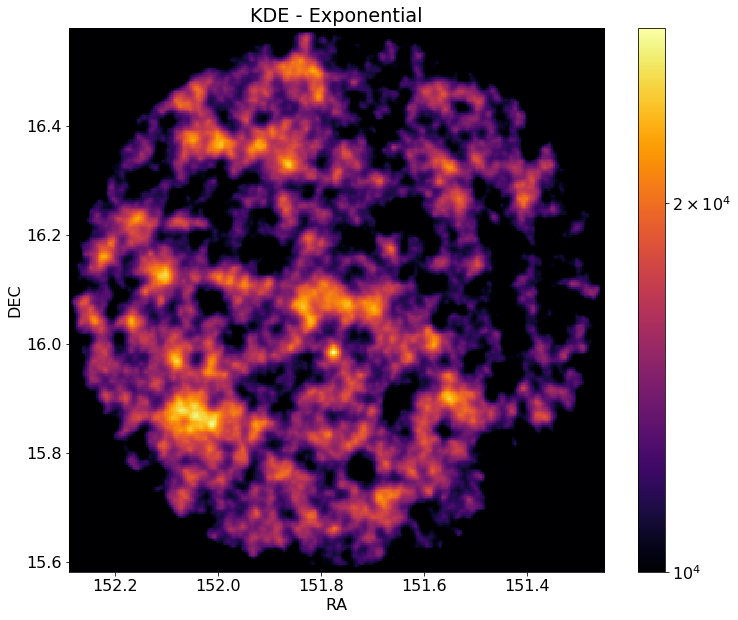

In [59]:
plt.figure(figsize = (12,10))

ramin = min(ra_segue)
ramax = max(ra_segue)
decmin = min(dec_segue)
decmax = max(dec_segue)

plt.title('KDE - Exponential')
plt.imshow(segue_exponential, norm=LogNorm(vmin = 10000), extent=(ramin, ramax, decmax, decmin),cmap = 'inferno', aspect = 'auto')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()

In [60]:
gal_segue = np.where((ra_segue >= 151.70) & (ra_segue <= 151.90) & (dec_segue >= 16.0) & (dec_segue <= 16.20))
gal_poss = np.where((ra_segue >= 152.0) & (ra_segue <= 152.2) & (dec_segue >= 15.8) & (dec_segue <= 16.0))
bg = np.where((ra_segue >= 151.60) & (ra_segue <= 151.80) & (dec_segue >= 15.90) & (dec_segue <= 15.9))

In [61]:
g = g_segue[gal_segue]
i = i_segue[gal_segue]
r = r_segue[gal_segue]

g1 = g_segue[gal_poss]
i1 = i_segue[gal_poss]
r1 = r_segue[gal_poss]

g_bg = g_segue[bg]
i_bg = i_segue[bg]
r_bg = r_segue[bg]

/Users/ragadeepika.pucha/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:932: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/Users/ragadeepika.pucha/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
/Users/ragadeepika.pucha/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (np.log(vmax) - np.log(vmin))


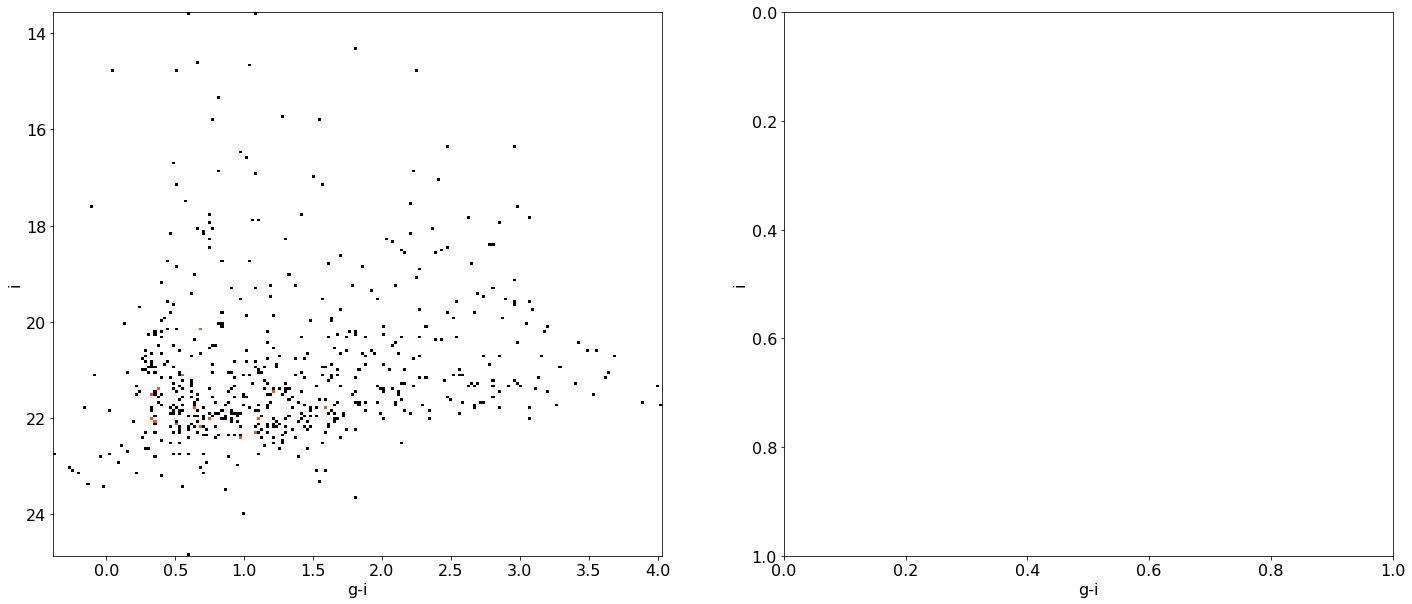

In [64]:
plt.figure(figsize = (24, 10))

plt.subplot2grid((1,2), (0,0))
plt.hist2d(g-i, i, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()

plt.subplot2grid((1,2), (0,1))
plt.hist2d(g_bg-i_bg, i_bg, bins = 200, norm = LogNorm(), cmap = 'inferno')
plt.xlabel('g-i')
plt.ylabel('i')
plt.gca().invert_yaxis()